## Importing the dependencies

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## Data collection and analysis

#### PIMA Diabetes Dataset

In [5]:
df = pd.read_csv('diabetes.csv')

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [10]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [11]:
X = df.drop(columns='Outcome',axis = 1)
y = df['Outcome']

In [12]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [13]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [14]:
scaler = StandardScaler()

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=y,random_state=10)

In [16]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
X_train

array([[ 2.50658223, -0.68206552,  0.76904438, ..., -0.24160352,
         0.10075787,  1.09548291],
       [-0.53042106, -0.39006555,  1.17948641, ...,  1.3683237 ,
         1.2518158 ,  1.77819663],
       [-0.22672073, -1.39584322,  0.05077082, ...,  0.07531128,
        -0.60212904,  0.4981084 ],
       ...,
       [-0.83412139,  0.81037878, -0.66750273, ..., -0.2796333 ,
         0.34580102, -0.35528374],
       [-0.83412139, -0.90917661,  0.05077082, ..., -0.19089716,
        -0.45703771, -0.86731903],
       [ 1.29178091, -0.68206552,  0.25599184, ...,  0.94999615,
         0.65855345,  0.83946526]])

In [18]:
X.shape,X_train.shape,X_test.shape

((768, 8), (576, 8), (192, 8))

In [19]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            confusion_matrix,precision_score, recall_score, f1_score, roc_auc_score,roc_curve
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [20]:
models={
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Support Vector Classifier (linear)":SVC(kernel='linear'),
    "Support Vector Classifier (poly)":SVC(kernel='poly'),
    "Support Vector Classifier (sigmoid)":SVC(kernel='sigmoid'),
    "Support Vector Classifier (rbf)":SVC(kernel='rbf'),
    "KNN Classifier":KNeighborsClassifier(n_neighbors=5,algorithm='auto'),
    "Gaussian Naive Bayes":GaussianNB(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier(),
    "Adaboost":AdaBoostClassifier(),
    "XgBoost":XGBClassifier()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.7656
- F1 score: 0.7570
- Precision: 0.7143
- Recall: 0.5473
- Roc Auc Score: 0.7150
----------------------------------
Model performance for Test set
- Accuracy: 0.8073
- F1 score: 0.8054
- Precision: 0.7419
- Recall: 0.6866
- Roc Auc Score: 0.7793


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.6927
- F1 score: 0.6932
- Precision: 0.5588
- Recall: 0.5672
- Roc Auc Score: 0.6636


Support Vector Classifier (linear)
Model performance for Training set
- Accuracy: 0.7656
- F1 score: 0.7561
- Precision: 0.7200
- Recall: 0.5373
- Roc Auc Score: 0.7127
----------------------------------
Model performance for Test set
- Accuracy: 0.8125
- F1 score: 0.8103
- Precision: 0.7541
- Recall: 0.6866
- Roc Auc Score: 0.7833


Support Vector Classifier (

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['linear']
}

In [22]:
from sklearn.svm import SVC
grid = GridSearchCV(SVC(),param_grid=param_grid,cv=5,verbose=3,refit=True)

In [23]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.759 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.757 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.739 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.748 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.722 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.759 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.757 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.739 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.748 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.722 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.759 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [24]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [25]:
grid.best_score_

0.7447676161919039

In [26]:
penalty = ['l1','l2','elasticnet']
c_values = [100,10,1.0,0.1,0.01]
solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
params = dict(penalty=penalty,C=c_values,solver=solver)

In [27]:
grid = GridSearchCV(estimator=LogisticRegression(),param_grid=params,scoring='accuracy',cv=5,n_jobs=-1)

In [28]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [29]:
grid.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}

In [30]:
grid.best_score_

0.7569865067466267

In [31]:
models = {
    "Logistic Regression": LogisticRegression(C=0.1, penalty='l2', solver='lbfgs'),
    "Support Vector Classifier": SVC(C=0.1, gamma=1, kernel='linear', probability=True)
}

# Loop through models
for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # ==============================
    # Training set performance
    # ==============================
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    # ==============================
    # Test set performance
    # ==============================
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)

    # ==============================
    # Print results
    # ==============================
    print(f"{name}")
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    print('----------------------------------')

    print("Confusion matrix")
    print(confusion_matrix(y_test, y_test_pred))

    print('----------------------------------')
    print("Classification report")
    print(classification_report(y_test, y_test_pred))

    print('=' * 35)
    print('\n')

Logistic Regression
Model performance for Training set
- Accuracy: 0.7622
- F1 score: 0.7524
- Precision: 0.7133
- Recall: 0.5323
- Roc Auc Score: 0.7088
----------------------------------
Model performance for Test set
- Accuracy: 0.8177
- F1 score: 0.8143
- Precision: 0.7759
- Recall: 0.6716
- Roc Auc Score: 0.7838
----------------------------------
Confusion matrix
[[112  13]
 [ 22  45]]
----------------------------------
Classification report
              precision    recall  f1-score   support

           0       0.84      0.90      0.86       125
           1       0.78      0.67      0.72        67

    accuracy                           0.82       192
   macro avg       0.81      0.78      0.79       192
weighted avg       0.81      0.82      0.81       192



Support Vector Classifier
Model performance for Training set
- Accuracy: 0.7656
- F1 score: 0.7556
- Precision: 0.7230
- Recall: 0.5323
- Roc Auc Score: 0.7115
----------------------------------
Model performance for Tes

Both models perform nearly identically, with test accuracy around 81.8%.
The SVM (linear kernel) has:
Slightly better recall (captures more positives).
Slightly better F1 and ROC AUC.

In [33]:
model = SVC(C=0.1, gamma=1, kernel='linear', probability=True)

In [34]:
model.fit(X_train, y_train)

SVC(C=0.1, gamma=1, kernel='linear', probability=True)

In [67]:
import pickle
pickle.dump(model,open('model.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))

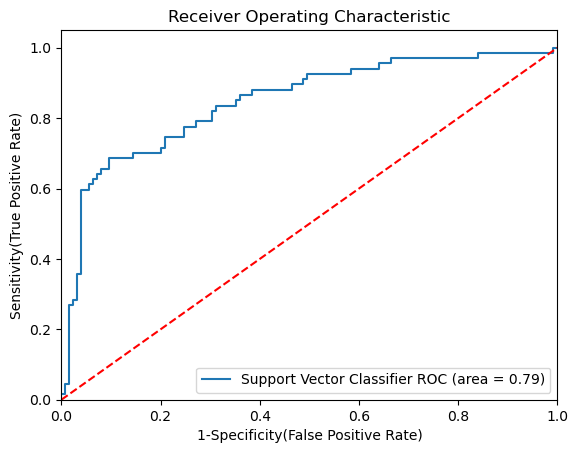

In [71]:
## Plot ROC AUC Curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Support Vector Classifier',
    'model': SVC(C=0.1, gamma=1, kernel='linear', probability=True),
    'auc':  0.7873
},
    
]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show()